Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

### Определение

Временным рядом принято называть последовательно измеренные через некоторые промежутки времени данные

а) думаю, что это временной ряд

б) если скорость измеряется через некторые промежутки времени в течении перелета-то это временной ряд

в) просто непривязанные не к чему колличесто отказов компьютера -это не временной ряд.допустим мы считаем каждый день колличество отказов компьютера в этот день, тогда эти данные можно считать временным рядом

г) думаю, что это временной ряд

д) думаю, что это временной ряд

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
#print(os.listdir())

In [81]:
data = pd.read_csv('DUQ_hourly.csv')

In [82]:
data.head()

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


In [83]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [84]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [86]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


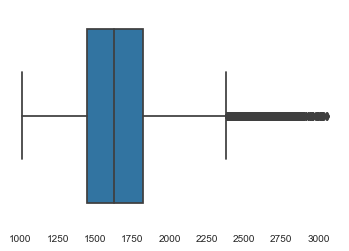

In [87]:
sns.boxplot(data.values)

In [88]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

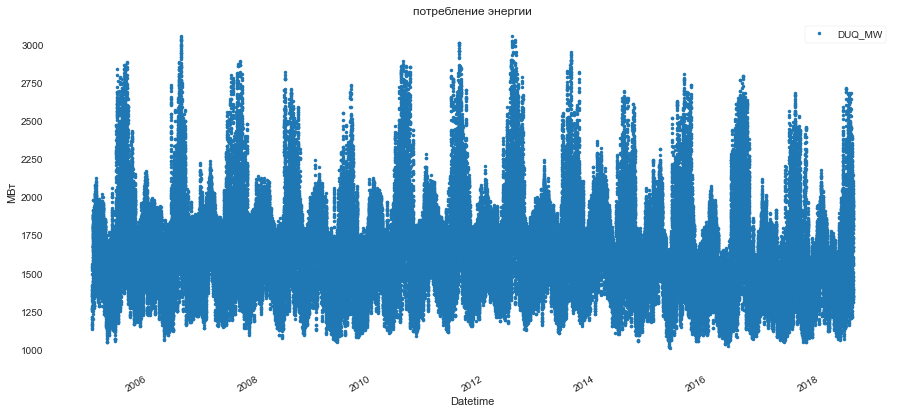

In [89]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'потребление энергии' )
plt.ylabel ( 'МВт' )

### Обсуждение визуализации

- Основные статистики показали, что пропусков нет
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы
    - Провалов ли всплесков потребления не наблюдается 

In [90]:
# pip install pandas_profiling

In [91]:
import pandas_profiling

In [92]:
pandas_profiling.ProfileReport(data)

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [93]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [94]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [95]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [96]:
brent_data[100:110]

,Значение
Дата,
2019-05-07,69.87
2019-05-06,70.98
2019-05-05,69.66
2019-05-03,70.78
2019-05-02,70.35
2019-05-01,72.05
2019-04-30,71.66
2019-04-29,71.42
2019-04-28,71.22


In [97]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

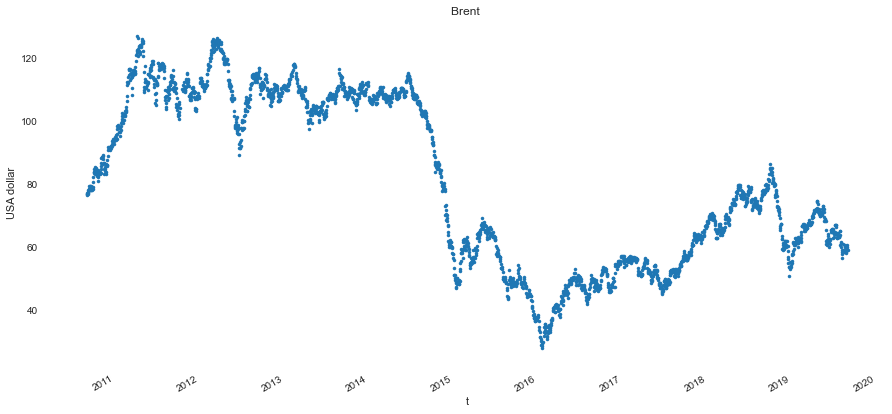

In [98]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [99]:
brent_data_week=brent_data.resample("W").mean()
brent_data_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


Text(0.5, 0, 't')

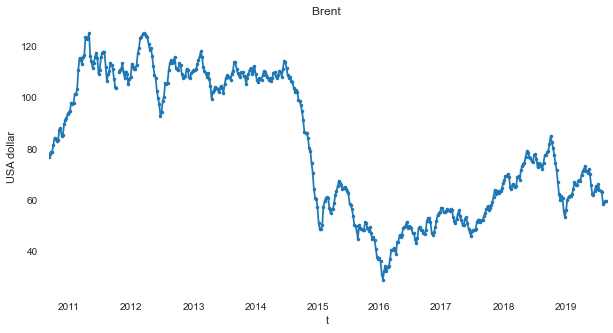

In [100]:
_ = brent_data_week['Значение'].plot( style='.-', figsize=( 10, 5 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [101]:
brent_data.resample("M").mean().head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


Text(0.5, 0, 't')

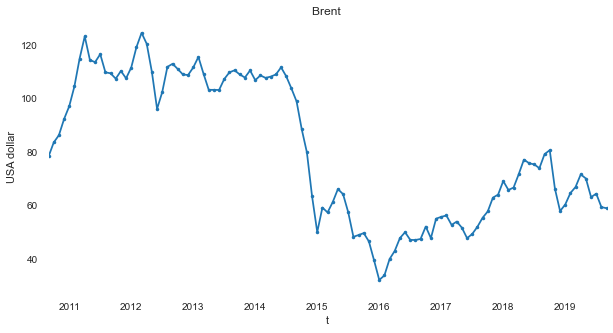

In [102]:
_ = brent_data.resample("M").mean()['Значение'].plot( style='.-', figsize=( 10, 5 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [103]:
brent_data.resample("Y").mean().head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


Text(0.5, 0, 't')

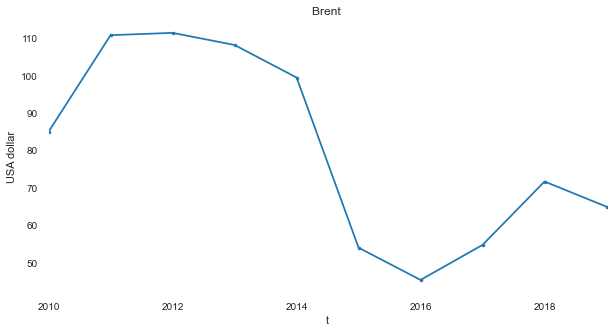

In [104]:
_ = brent_data.resample("Y").mean()['Значение'].plot( style='.-', figsize=(10, 5 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Вывод: каждый график по своему информативен. Какой использовать -зависит от наших целей. Хотим ли мы покупать нефть на несколько лет вперед или мы заключаем договор на поставку в течении нескольких месяцев.

Годовой график стал более "гладкий". Ценой усреднения мы как будто избавились от шумов (изменение цены в месяц или в неделю). Это сделало график более удобным к воприятю при наблюдении на больших промежутках времени. Если мы ориетируемся на длительные вложения денег-Например мы хотим заключить договор на покупку нефти на несколько лет вперед-то поледний график будет более наглядный для оценки перспектив такой сделки.

Если договор заключется на поставку нефти в течении года, то предпочтительно ориентироваться на месечный график. Он более инфрмативный.

Анализ пропуска

Text(0.5, 0, 't')

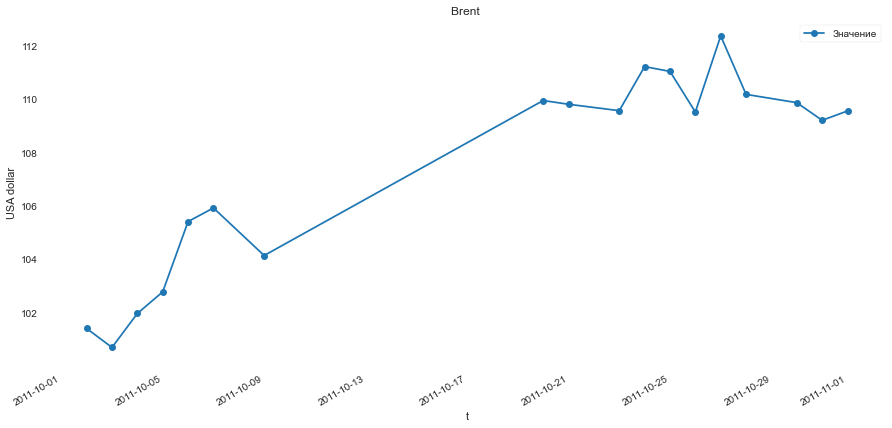

In [105]:
_ = brent_data['2011-11-01':'2011-10-01'].plot( style='-o', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [106]:
brent_data['2011-11-01':'2011-10-01']

,Значение
Дата,
2011-11-01,109.54
2011-10-31,109.19
2011-10-30,109.85
2011-10-28,110.16
2011-10-27,112.35
2011-10-26,109.50
2011-10-25,111.02
2011-10-24,111.20
2011-10-23,109.55


Как видим данные между 2011-10-09 и 2011-10-20 отсутсвуют

Text(0.5, 0, 't')

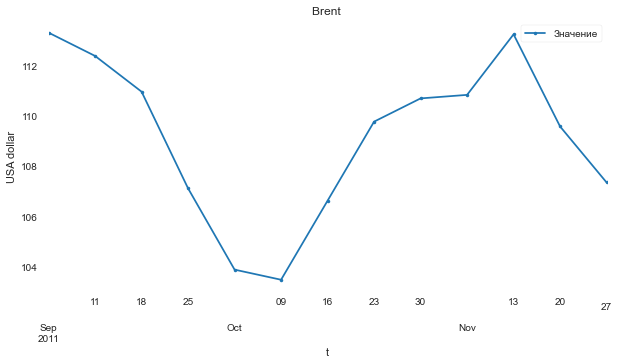

In [116]:
_ = brent_data_week['2011-08-30 ':'2011-11-30 '].plot( style='.-', figsize=( 10, 5 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [108]:
brent_data_week['2011-09-25 ':'2011-10-30']

,Значение
Дата,
2011-09-25,107.106667
2011-10-02,103.878333
2011-10-09,103.476667
2011-10-16,NaN
2011-10-23,109.756667
2011-10-30,110.680000


недельный перерасчет для даты 2011-10-16 записывает значение NaN

In [109]:
brent_data_week.loc['2011-10-09']

Значение    103.476667
Name: 2011-10-09 00:00:00, dtype: float64

In [110]:
brent_data_week.loc['2011-10-23']

Значение    109.756667
Name: 2011-10-23 00:00:00, dtype: float64

In [111]:
brent_data_week.loc['2011-10-16']

Значение   NaN
Name: 2011-10-16 00:00:00, dtype: float64

нахожу среднее значение и записываю в место NaN чтобы избавиться от пропуска

In [112]:
brent_data_week.loc['2011-10-16']=(brent_data_week.loc['2011-10-09']+brent_data_week.loc['2011-10-23'])/2

In [113]:
brent_data_week.loc['2011-10-16']

Значение    106.616667
Name: 2011-10-16 00:00:00, dtype: float64

Text(0.5, 0, 't')

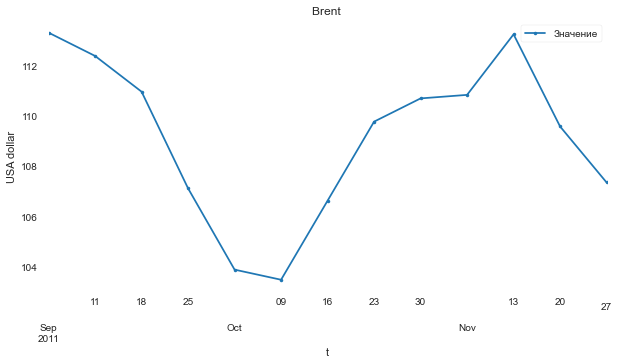

In [114]:
_ = brent_data_week['2011-08-30 ':'2011-11-30 '].plot( style='.-', figsize=( 10, 5 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [115]:
brent_data_week['2011-09-25 ':'2011-10-30']

,Значение
Дата,
2011-09-25,107.106667
2011-10-02,103.878333
2011-10-09,103.476667
2011-10-16,106.616667
2011-10-23,109.756667
2011-10-30,110.680000
